#### Artificial Intelligence - Regressions
<hr/>


## Team Members
| Name (Alphabetically ordered)| StdNo |
| ----------- | ----------- |
| Sam Asadi | 9532287 |
| Hossein Dehghanipour | 9532250 |
| Bahare Moradi | 9532245 |

Shiraz University - Spring 2020

## Part B (Bahare Moradi)

importing libraries

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Reading files with pnadas

In [2]:
file_name_1 = 'Dataset1.txt'
file_name_2 = 'Dataset2.txt'

def read_data(file_name):
    data = pd.read_csv(file_name, delimiter=";")
    return data

data_1 = read_data(file_name_1)
data_2 = read_data(file_name_2)

#print (data_1)
#print (data_2)

Ploting models with function below

In [3]:
def plot_models(dataset, models, x_new, label): 
    fig, axs = plt.subplots(2, 2)
    x = np.linspace(0,1,100)
    fig.suptitle(label)
    
    axs[0, 0].set_title('x_new: ' + str(x_new[0]))
    axs[0, 0].plot(x, models[0][1] * x + models[0][0], '-b')
    axs[0, 0].plot(dataset['Height'].values.tolist(), dataset['Weight'].values.tolist(), 'co', marker = '.')
    axs[0, 1].set_title('x_new: ' + str(x_new[1]))
    axs[0, 1].plot(x, models[1][1] * x + models[1][0], '-y')
    axs[0, 1].plot(dataset['Height'].values.tolist(), dataset['Weight'].values.tolist(), 'co', marker = '.')
    axs[1, 0].set_title('x_new: ' + str(x_new[2]))
    axs[1, 0].plot(x, models[2][1] * x + models[2][0], '-g')
    axs[1, 0].plot(dataset['Height'].values.tolist(), dataset['Weight'].values.tolist(), 'co', marker = '.')
    axs[1, 1].set_title('x_new: ' + str(x_new[3]))
    axs[1, 1].plot(x, models[3][1] * x + models[3][0], '-r')
    axs[1, 1].plot(dataset['Height'].values.tolist(), dataset['Weight'].values.tolist(), 'co', marker = '.')
    
    for ax in axs.flat:
        ax.set(xlabel='Height', ylabel='Weight')

    for ax in axs.flat:
        ax.label_outer()

#### Normalizing data with this:
$$ data_i =\frac{data_i - min(data)}{max(data) - min(data)} $$

In [4]:
def normalize(data):
    max_height, max_weight = max(data['Height']), max(data['Weight'])
    min_height, min_weight = min(data['Height']), min(data['Weight'])

    data_copy = data.copy()

    for i in range(len(data['Height'])):
        data_copy['Height'][i] = (data['Height'][i] - min_height)/(max_height - min_height)
    for i in range(len(data['Weight'])):
        data_copy['Weight'][i] = (data['Weight'][i] - min_weight)/(max_weight - min_weight)
        
    return data_copy

normalized_data_1 = normalize(data_1)
normalized_data_2 = normalize(data_2)
# print (normalized_data_1)
# print ("=======")
# print (normalized_data_2)

### Closed form

The predicted the number of page views for a given page index using a hypothesis $h_\theta(x)$ defined as :
$$ h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 $$
$$ = \sum_{i=0}^{n-1} \theta_i x_i $$
$$ = \theta^T x $$

Goal is to find the parameter vector $\theta$ which minimizes the square of the error between the predicted value $h_\theta(x)$ and the actual output $y$ for all $j$ values in the training set with weight $w^j$ i.e.

$$ min \sum_{j=1}^{m}w^j[h_\theta(x^j)-y^j]^2 $$

where,

W is the diagonal matrix of dimension [m x m].
$$ W = 
 \begin{bmatrix}
  w^0 & 0 & \cdots & 0 \\
  0 & w^1 & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & w^m 
 \end{bmatrix} $$
 
X is the input sequence of dimension [m x n]

$$ X = 
\begin{bmatrix}
  x_0^1 & x_1^1 \\
  x_0^2 & x_1^2 \\
  \vdots  & \vdots \\
  x_0^m & x_1^m 
 \end{bmatrix} $$
 
Y is the measured values of dimension [m x 1]

$$ Y = 
\begin{bmatrix}
  y^1 \\
  y^2 \\
  \vdots \\
  y^m
 \end{bmatrix} $$
 
$\theta$ is the parameter vector of dimension [n x 1].

$$ \theta = 
\begin{bmatrix}
  \theta_0 \\
  \theta_1
 \end{bmatrix} $$
 
 Defining the cost function $\theta(j)$ as,
 
 $$ J(\theta) = \frac{1}{2} \sum_{j=1}^{m} w^j [h_\theta(x^j)-y^j]^2 = \frac{1}{2}(X\theta-Y)^T W(X\theta-Y) $$
 
 To find the value of $\theta$ which minimizes $J(\theta)$, we can differentiate $J(\theta)$ with respect to $\theta$, i.e.
 
 $$ \frac{\partial}{\partial \theta} J(\theta) = (X^T W X \theta - X^T WY) $$
 
 To find the value of $\theta$ which minimizes $\theta$,  we set
 
 $$ \frac{\partial}{\partial \theta} J(\theta) = 0 $$
 $$ (X^T W X \theta - X^T WY) = 0 $$
 
 The weighted least squares solution is, 
 
 $$ \theta = (X^T WX)^{-1} X^TWY $$
 
 A fairly standard choice for the weights is
 
 $$ w^{(i)} = \exp(-\frac{(x^i - x)^2}{2}) $$
 
 > Here, the $w^{(i)}$’s are non-negative valued weights. Intuitively, if $w^{(i)}$is large for a particular value of $i$, then in picking $\theta$, we’ll try hard to make $ (y^{(i)} - \theta^T x^{(i)})^2 $ small. Ifw(i)is small, then the $ (y^{(i)} - \theta^T x^{(i)})^2 $ error term will bepretty much ignored in the fit.

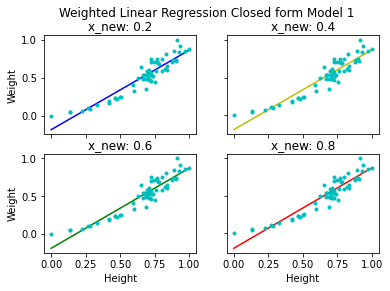

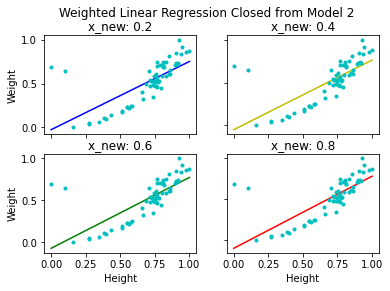

In [5]:
x_new = [0.2, 0.4, 0.6, 0.8]

def closed_form(dataset, x_n):
    x = dataset['Height'].values.tolist()
    y = dataset['Weight'].values.tolist()
    X = np.c_[x, np.ones(len(x))]
    n = len(dataset)
    W = np.zeros((n, n))
    for i in range(len(W)):
        W[i][i] = np.exp(-1 * (((dataset['Height'][i] - x_n) ** 2) / 2))
    
    theta = np.linalg.inv(np.transpose(X).dot(np.dot(W, X))).dot(np.transpose(X)).dot(np.dot(W, y))
    theta[0], theta[1] = theta[1], theta[0]
    return theta

thetas_1 = []
thetas_2 = []
for x in x_new:
    thetas_1 += [closed_form(normalized_data_1, x)]
    thetas_2 += [closed_form(normalized_data_2, x)]
    
plot_models(normalized_data_1, thetas_1, x_new, 'Weighted Linear Regression Closed form Model 1')
plot_models(normalized_data_2, thetas_2, x_new, 'Weighted Linear Regression Closed from Model 2')

### Gradient Descent
Like Linear regression but we add weight in calculation
$$ \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m w * [(h_\theta (x_i)-y)x_i] $$
Weight is also
 $$ w^{(i)} = \exp(-\frac{(x^i - x)^2}{2}) $$

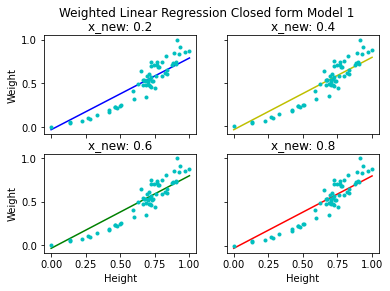

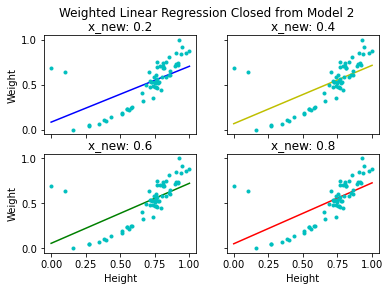

In [6]:
def theta_j(dataset, theta, x_n):
        theta_0, theta_1 = 0, 0
        for i in range(len(dataset)):
            w = np.exp(-1 * (((dataset['Height'][i] - x_n) ** 2) / 2))
            theta_0 += w * ((theta[1] * dataset['Height'][i] + theta[0]) - dataset['Weight'][i])
            theta_1 += w * (((theta[1] * dataset['Height'][i] + theta[0]) - dataset['Weight'][i]) * dataset['Height'][i])
        return theta_0, theta_1

def gradient_descent(dataset, x_n, theta=[0, 0], alpha = 0.28, iterations = 150):
    m = len(dataset)
    
    for iteration in range (iterations):
        new_theta = [0, 0]
        
        updated_0, updated_1 = theta_j(dataset, theta, x_n)
        new_theta[0] = theta[0] - alpha * (updated_0/m)
        new_theta[1] = theta[1] - alpha * (updated_1/m)
        
        theta = new_theta
            
    return theta

thetas_1 = []
thetas_2 = []

for x in x_new:
    thetas_1 += [gradient_descent(normalized_data_1, x)]
    thetas_2 += [gradient_descent(normalized_data_2, x)]
    
plot_models(normalized_data_1, thetas_1, x_new, 'Weighted Linear Regression Closed form Model 1')
plot_models(normalized_data_2, thetas_2, x_new, 'Weighted Linear Regression Closed from Model 2')

Plot the outlier dataset and the models obtained from both the previous and the current part on the same figure. Compare the results of parts A and B.
> With comparing the figure results from parts A and B, we realized that the effects of the outliers of datasets in weighted linear regression is noticably decreased.

When and how does WLR work better than simple linear regression?

> Like all of the least squares methods discussed so far, weighted least squares is an efficient method that makes good use of small data sets. It also shares the ability to provide different types of easily interpretable statistical intervals for estimation, prediction, calibration and optimization. In addition, as discussed above, the main advantage that weighted least squares enjoys over other methods is the ability to handle regression situations in which the data points are of varying quality. If the standard deviation of the random errors in the data is not constant across all levels of the explanatory variables, using weighted least squares with weights that are inversely proportional to the variance at each level of the explanatory variables yields the most precise parameter estimates possible.